In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
card_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/공부/code/creditcard.csv")

In [3]:
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [95]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

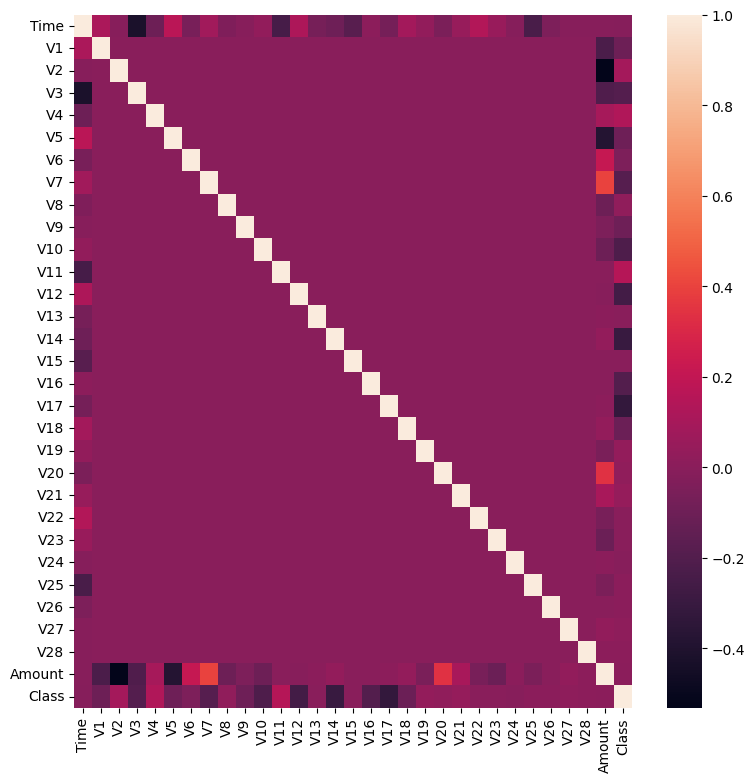

In [97]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(card_df.corr())

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

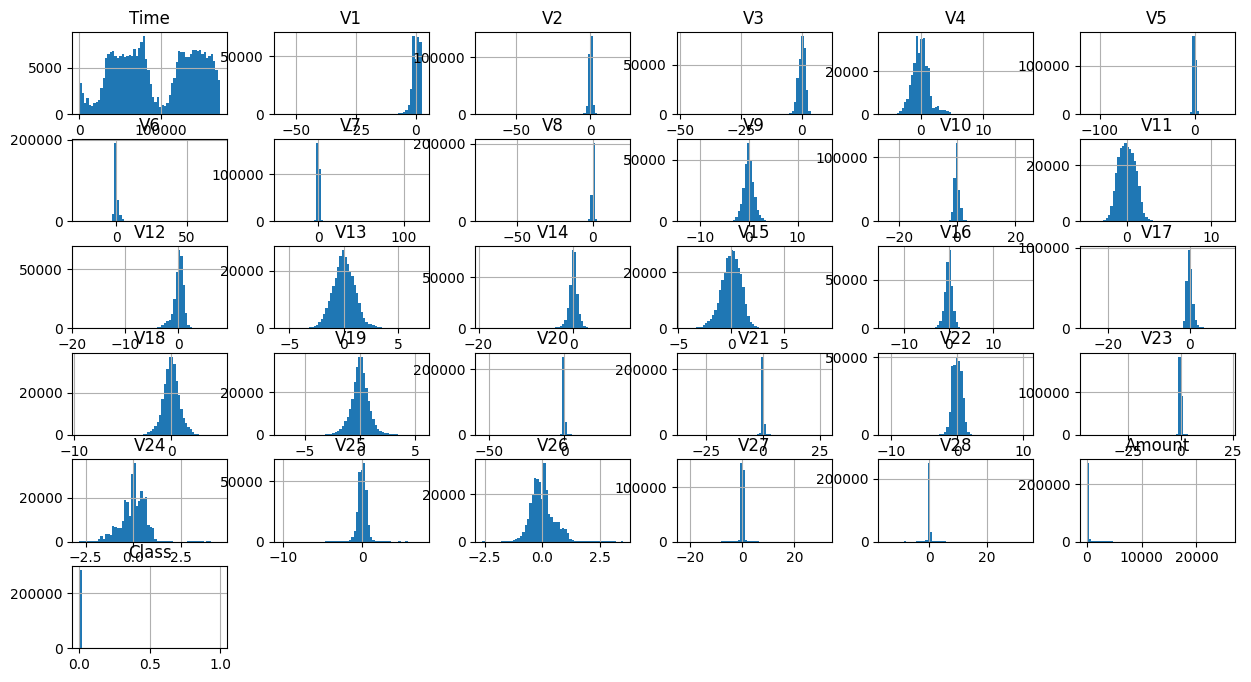

In [99]:
card_df.hist(bins=60, figsize=(15,8))

In [10]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time',axis=1, inplace=True)
  return df_copy

In [23]:
get_preprocessed_df(card_df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
card_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [52]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time',axis=1, inplace=True)
  return df_copy

def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  X = df_copy.iloc[:,:-1]
  y = df_copy.iloc[:,-1]
  X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)
  return X_train,X_test,y_train,y_test

In [53]:
X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve


def get_clf_eval(y_test,y_pred=None,pred_proba=None):
  confusion = confusion_matrix(y_test,y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  F1 = f1_score(y_test, y_pred)
  AUC = roc_auc_score(y_test, pred_proba)

  print('오차행렬:\n', confusion)
  print('\n정확도: {:.4f}'.format(accuracy))
  print('정밀도: {:.4f}'.format(precision))
  print('재현율: {:.4f}'.format(recall))
  print('F1: {:.4f}'.format(F1))
  print('AUC: {:.4f}'.format(AUC))

In [40]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_acerage=False)
model.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: boost_from_acerage
[LightGBM] [Warning] Unknown parameter: boost_from_acerage
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

LGBMClassifier(boost_from_acerage=False, n_estimators=1000, n_jobs=-1,
               num_leaves=64)

In [82]:
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]
print(f"모델 평가 점수:{accuracy_score(y_test,pred)}")

[LightGBM] [Warning] Unknown parameter: boost_from_acerage
[LightGBM] [Warning] Unknown parameter: boost_from_acerage
모델 평가 점수:0.9990637032875719


In [84]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬:
 [[85270    25]
 [   55    93]]

정확도: 0.9991
정밀도: 0.7881
재현율: 0.6284
F1: 0.6992
AUC: 0.8140


[LightGBM] [Warning] Unknown parameter: boost_from_acerage


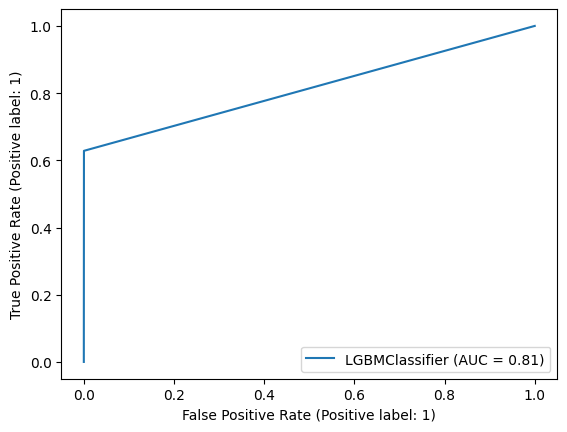

In [48]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model,X_test,y_test)

In [58]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)

In [62]:
lr_clf.fit(X_train,y_train)
lr_pred =  lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [68]:
print(lr_clf.score(X_test,y_test))

0.99916903666772


In [85]:
get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차행렬:
 [[85281    14]
 [   57    91]]

정확도: 0.9992
정밀도: 0.8667
재현율: 0.6149
F1: 0.7194
AUC: 0.9704


In [107]:
import numpy as np

def get_outlier(df=None,column=None, weight=1.5):
  fraud = df[df['Class']==1][column]
  quantile_25=np.percentile(fraud.values,25)
  quantile_75=np.percentile(fraud.values,75)
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr*weight
  lowest_val = quantile_25-iqr_weight
  highest_val = quantile_75+iqr_weight
  outlier_index = fraud[(fraud < lowest_val)| (fraud> highest_val)].index
  return outlier_index


In [108]:
outlier_index = get_outlier(df=card_df,column='V14', weight=1.5)

In [109]:
print(outlier_index)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')


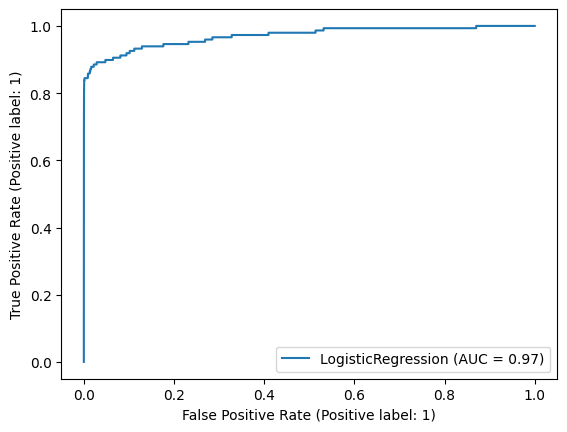

In [67]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_clf,X_test,y_test)

In [64]:
model_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [87]:
model_lr.fit(X_train,y_train)
pred_lr = model_lr.predict(X_test)
pred_proba_lr = model_lr.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba_lr)

오차행렬:
 [[85270    25]
 [   55    93]]

정확도: 0.9991
정밀도: 0.7881
재현율: 0.6284
F1: 0.6992
AUC: 0.9701


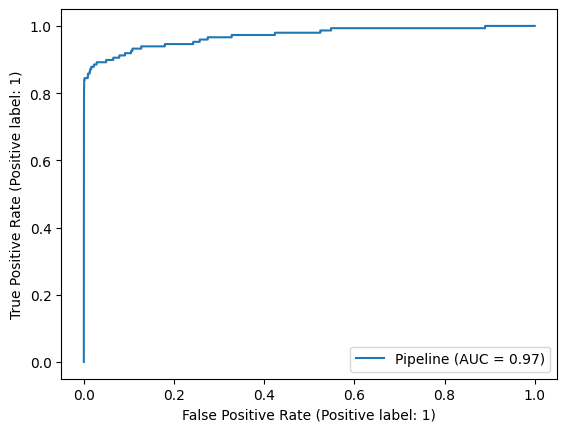

In [69]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model_lr,X_test,y_test)

In [71]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [72]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

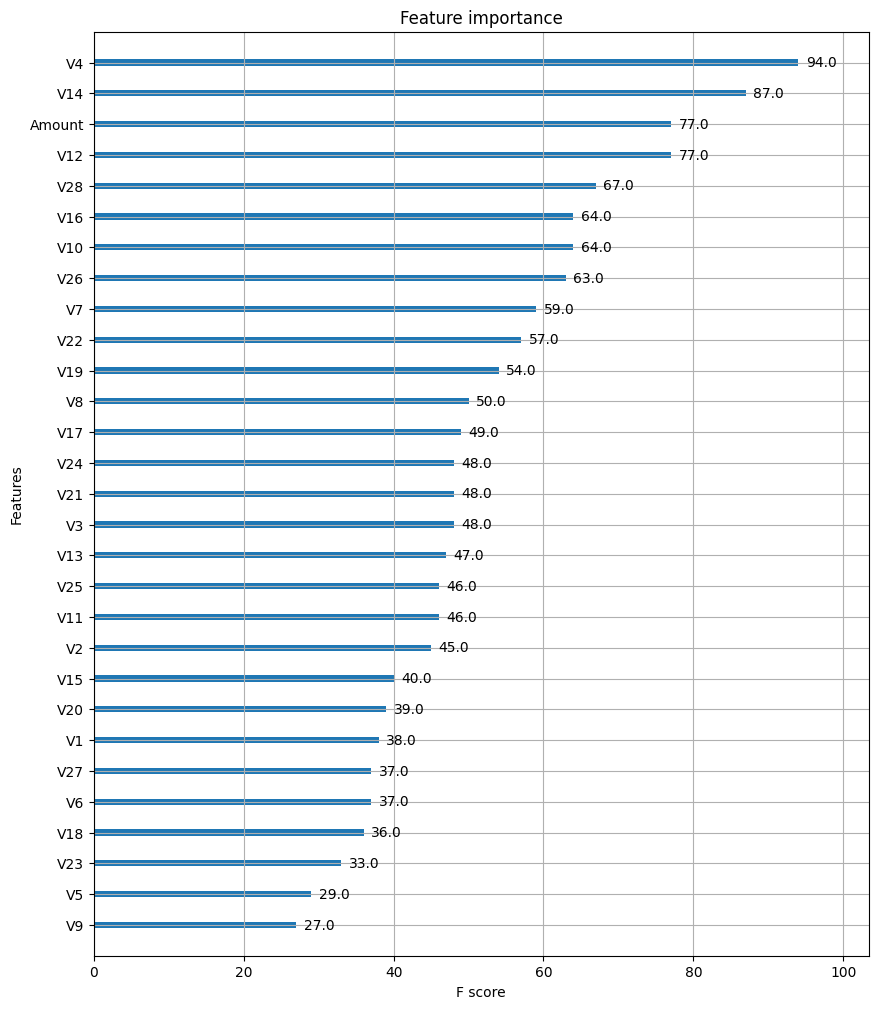

In [74]:
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb, ax=ax)

In [88]:
pred = xgb.predict(X_test)
pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))
print(accuracy_score(y_test,pred))

1.0
0.9994967405170698
0.9994967405170698


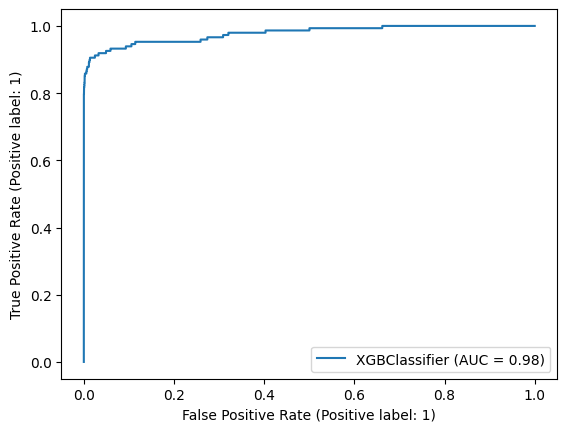

In [89]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xgb,X_test,y_test)

In [90]:
get_clf_eval(y_test,pred,pred_proba_xgb)

오차행렬:
 [[85289     6]
 [   37   111]]

정확도: 0.9995
정밀도: 0.9487
재현율: 0.7500
F1: 0.8377
AUC: 0.9778


In [91]:
pred[:5]

array([0, 0, 0, 0, 0])

In [92]:
y_test[:5]

170978    0
96185     0
30469     0
266925    0
14185     0
Name: Class, dtype: int64